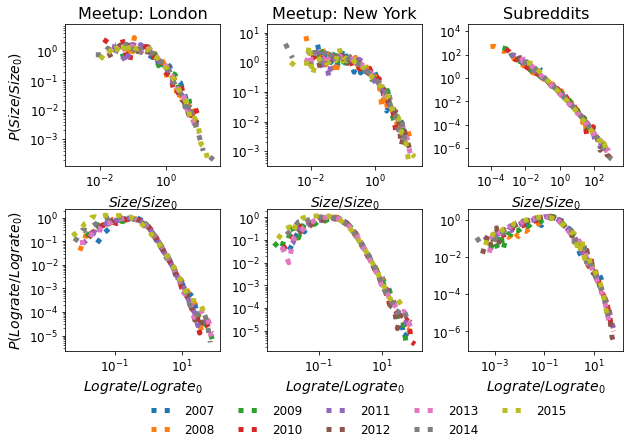

In [2]:
data= {}

communities = ["cityLondon", "cityNY", "reddit2017"]

for params in ["sizes", "logrates"]:
    data[params]={}
    for comm in communities:
        file = "Results/data/%s/%s_%s_normed_per_year.json"%(comm, comm, params)
        data[params][comm] = json.load(open(file))
        
figures_functions.plot_sizes_rates_in_row(data, 2007, 2015)
plt.savefig("Fig1.png", dpi=300, bbox_inches="tight")

In [2]:
import matplotlib.pyplot as plt
import powerlaw
import matplotlib.pyplot as plt
import powerlaw
from powerlaw import plot_pdf, Fit
import json
import figures_functions
import  numpy as np

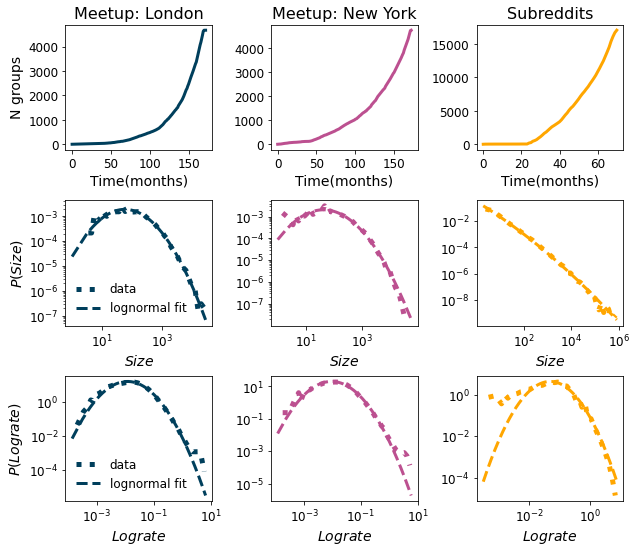

In [6]:
import pandas as pd
communities = ["cityLondon", "cityNY", "reddit2012"]
data_dict={}

params="Ngroups"

data_dict[params]={}
for category in communities:
    ts = pd.read_csv("./Results/data/%s/%s_ts.csv"%(category, category))
    data_dict[params][category]=ts["total_groups"][:173]
#for params in ["Ngroups", "p_sizes", "p_logrates", "rate_size"]:
params="p_sizes"
data_dict[params]={}
for category in communities:
    data = np.loadtxt("./Results/data/%s/%s_sizes.txt"%(category, category))
    data_dict[params][category]=data
    
params="p_logrates"

data_dict[params]={}
for category in communities:
    data = np.loadtxt("./Results/data/%s/%s_logrates.txt"%(category, category))
    data_dict[params][category]=data

params = "rate_size"
data_dict[params]={}
for category in communities:
    data = np.loadtxt("Results/data/%s/%s_sizes_rates.txt"%(category, category))
    data_dict[params][category]=data
    
    
color_dict = {"cityLondon": "#003f5c", 
              "cityNY": "#bc5090",
              "reddit2012":"#ffa600"}
figures_functions.plot_statistics_row(data_dict, color_dict)
#plt.savefig("Fig2.png", dpi=300, bbox_inches='tight')
